# Import data

In [11]:
import pandas as pd

# Load the training data
train_df = pd.read_csv('../data/train.csv')



# Exploratory Analysis

In [6]:
#Shape of the dataframe
print("Shape of the dataframe:", train_df.shape)


print("\nFirst few rows:")
print(train_df.head())

#Dataframe info
print("\nDataframe info:")
print(train_df.info())

#Basic statistics
print("\nBasic statistics:")
print(train_df.describe())


Shape of the dataframe: (750000, 9)

First few rows:
   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate 

In [8]:
# Check for duplicate IDs in the training data
print("Total rows:", len(train_df))
print("Unique IDs:", train_df['id'].nunique())
print("Duplicate IDs:", len(train_df) - train_df['id'].nunique())

# Show the duplicate IDs if any exist
duplicates = train_df[train_df['id'].duplicated(keep=False)]
if len(duplicates) > 0:
    print("\nDuplicate IDs found:")
    print(duplicates[['id']].sort_values('id'))
else:
    print("\nNo duplicate IDs found!")

# Alternative method using value_counts
print("\nID frequency (showing only IDs that appear more than once):")
id_counts = train_df['id'].value_counts()
duplicate_ids = id_counts[id_counts > 1]
if len(duplicate_ids) > 0:
    print(duplicate_ids)
else:
    print("All IDs are unique!")

Total rows: 750000
Unique IDs: 750000
Duplicate IDs: 0

No duplicate IDs found!

ID frequency (showing only IDs that appear more than once):
All IDs are unique!


Distribution of data

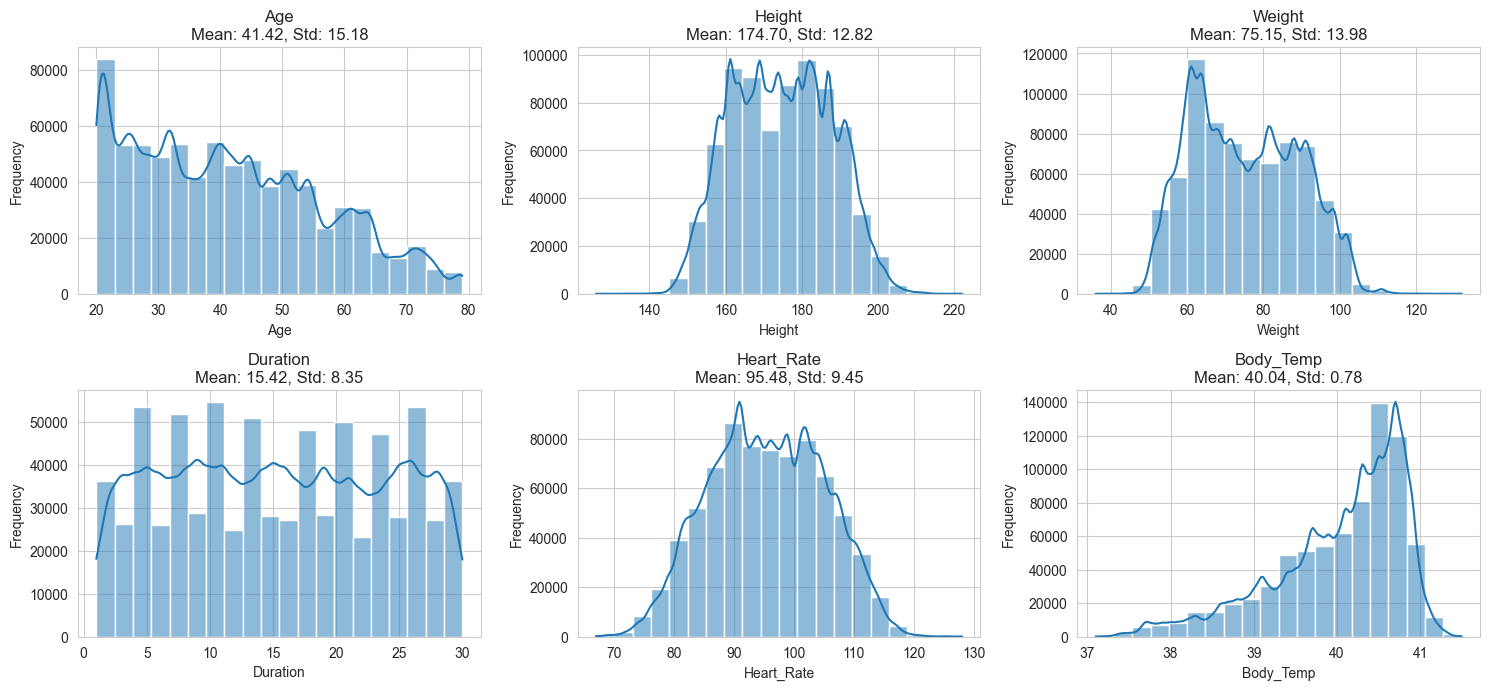

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set the style of the plots
sns.set_style("whitegrid")

columns_to_plot = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp']

plt.figure(figsize=(15,10))

for column in columns_to_plot:
    plt.subplot(3,3,columns_to_plot.index(column)+1)
    sns.histplot(train_df[column], bins=20, kde=True)
    plt.title(f'{column}\nMean: {train_df[column].mean():.2f}, Std: {train_df[column].std():.2f}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


1. Age
Trend: The distribution is right-skewed, with a higher frequency of younger individuals (20–30 years) and a gradual decline as age increases.
Implication: The dataset contains more young participants, which may influence model generalization for older age groups.
2. Height
Trend: The distribution is approximately normal (bell-shaped), centered around 175 cm.
Implication: This is typical for human height data, suggesting a balanced representation of heights.
3. Weight
Trend: The distribution is slightly right-skewed, with a peak around 60–80 kg and a tail extending toward higher weights.
Implication: Most participants are in the average weight range, with fewer high-weight outliers.
4. Duration
Trend: The distribution is nearly uniform, with all durations (1–30) being almost equally represented.
Implication: The dataset is well-balanced in terms of activity duration, which is good for modeling.
5. Heart_Rate
Trend: The distribution is approximately normal, centered around 95 BPM.
Implication: Most heart rates are within a typical exercise range, with few outliers.
6. Body_Temp
Trend: The distribution is left-skewed, with most values clustered around 40–41°C.
Implication: The body temperature values are higher than typical resting temperatures, possibly due to measurement during or after exercise.
Summary of Trends
Most features are well-distributed, with Age and Weight showing some skewness.
Height and Heart_Rate are normally distributed, which is ideal for many modeling techniques.
Duration is uniformly distributed, which is excellent for unbiased model training.
Body_Temp is left-skewed, likely due to the context of measurement (exercise).


Correlation Matrix

Correlation of each feature with 'calories':
Calories      1.000000
Duration      0.959908
Heart_Rate    0.908748
Body_Temp     0.828671
Age           0.145683
Weight        0.015863
id            0.001148
Height       -0.004026
Name: Calories, dtype: float64


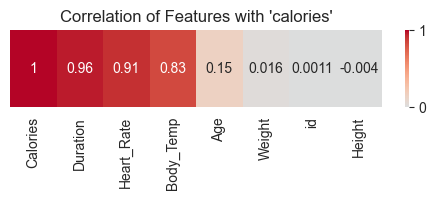

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for all columns with 'calories'
corr_matrix = train_df.corr(numeric_only=True)

# Extract only the correlations with 'calories'
calories_corr = corr_matrix['Calories'].sort_values(ascending=False)

print("Correlation of each feature with 'calories':")
print(calories_corr)

# Optional: Visualize as a heatmap
plt.figure(figsize=(6, 1))
sns.heatmap(calories_corr.to_frame().T, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation of Features with 'calories'")
plt.yticks([])
plt.show()

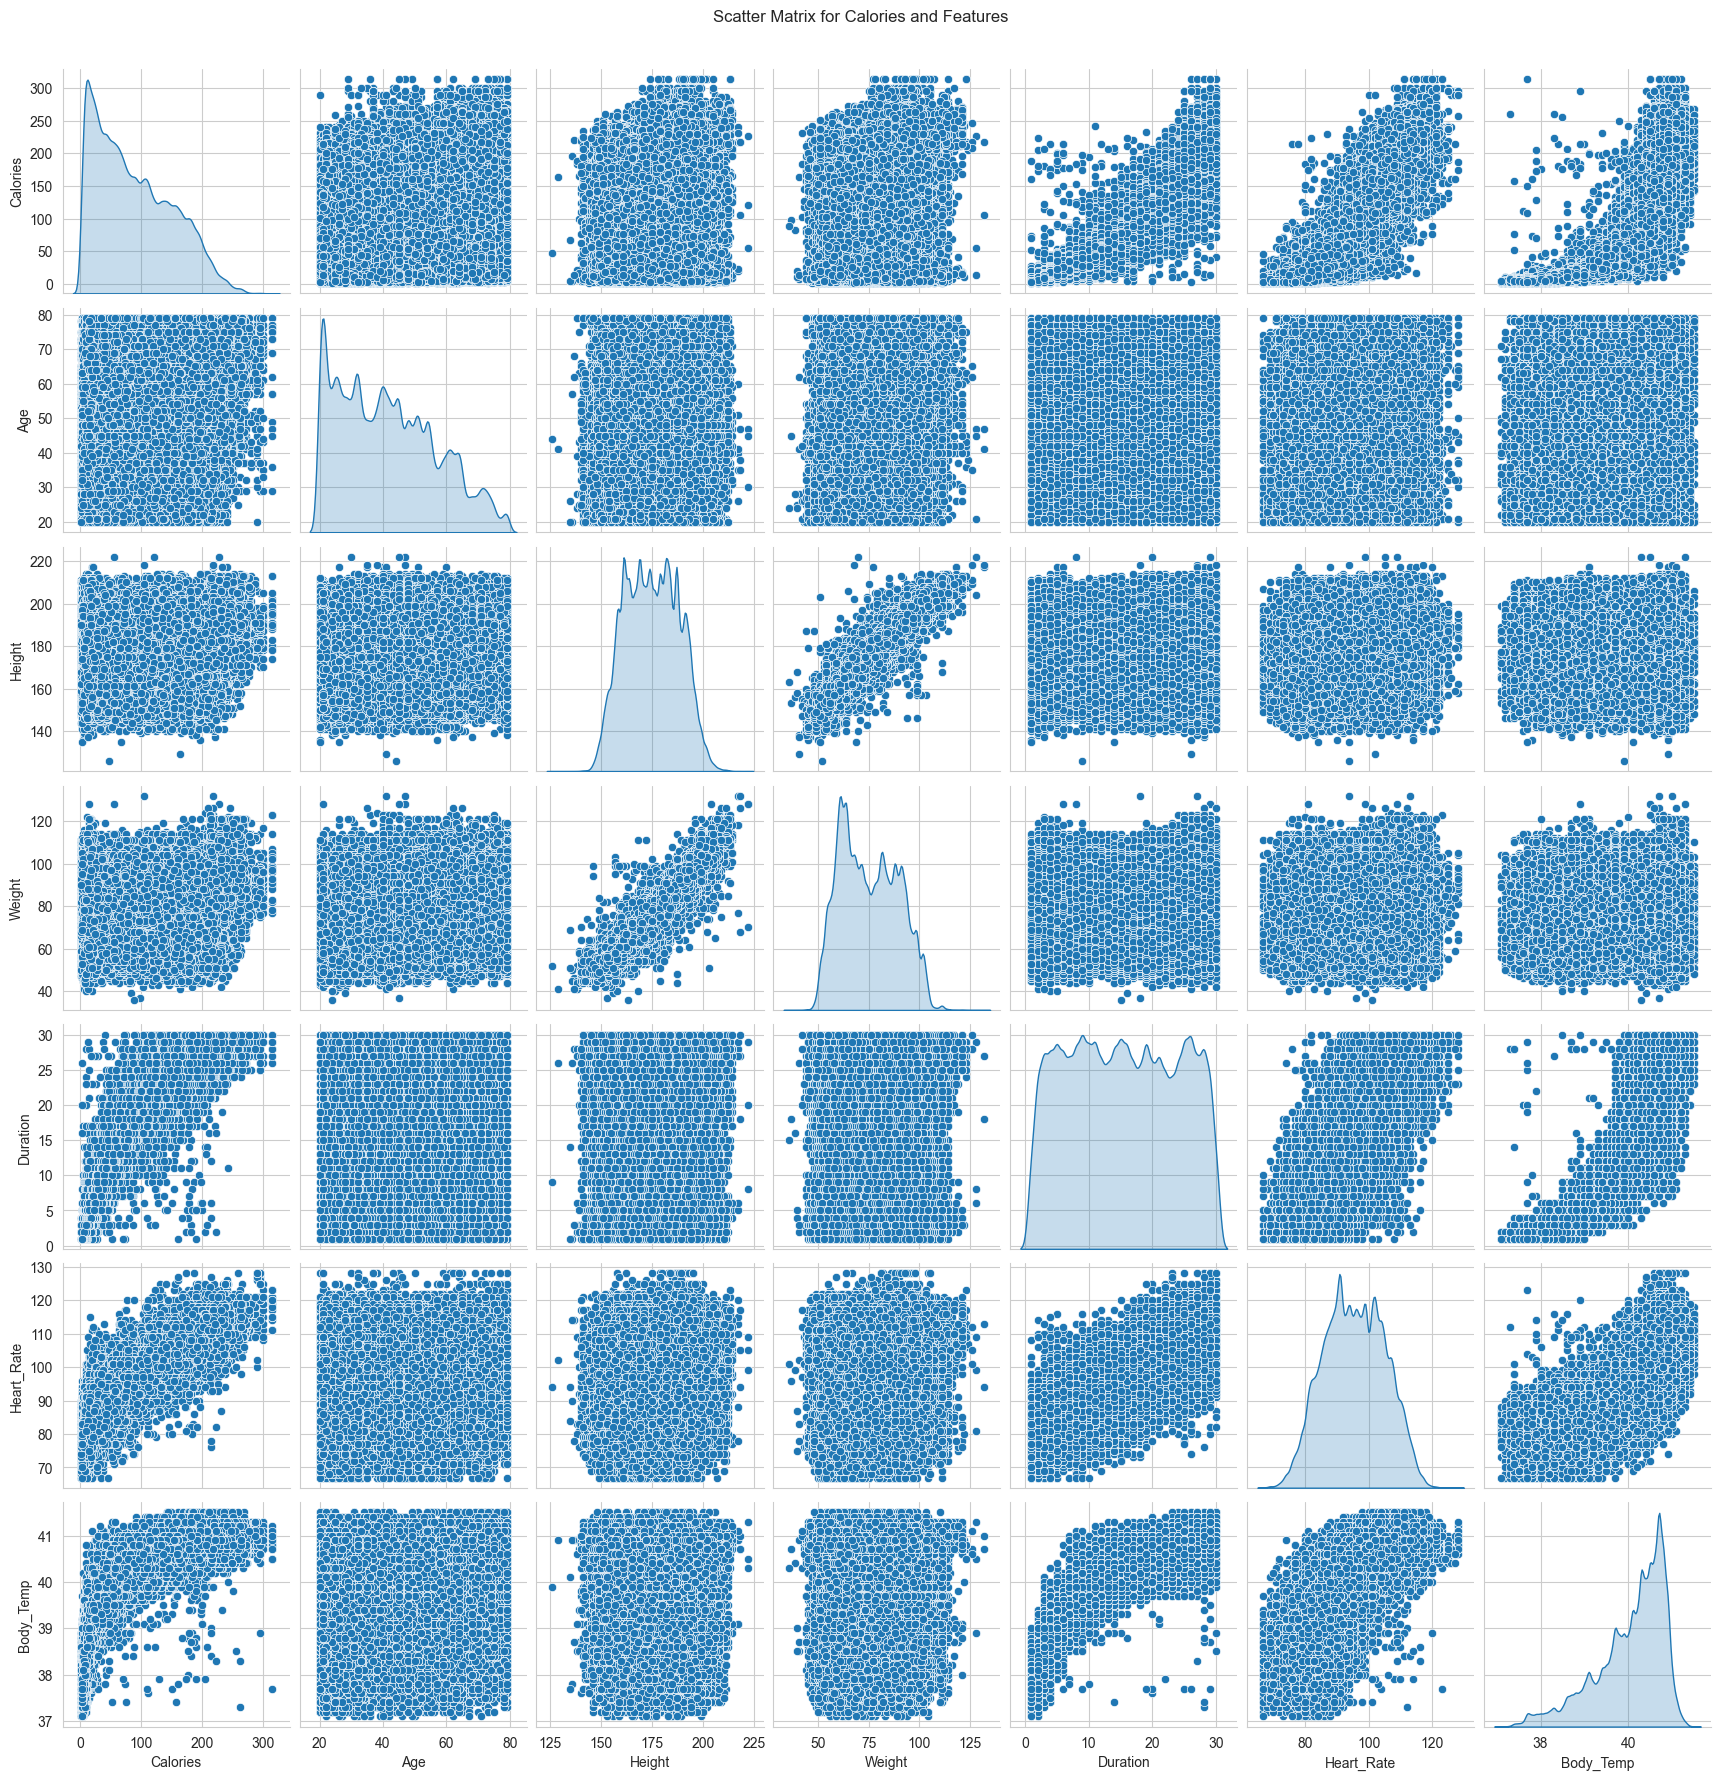

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the scatter matrix
columns_to_plot = ['Calories', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

# Create the scatter matrix (pairplot)
sns.pairplot(train_df[columns_to_plot], diag_kind='kde')
plt.suptitle("Scatter Matrix for Calories and Features", y=1.02)
plt.show()

Duration, Heart_Rate, and Body_Temp are the strongest predictors of calorie expenditure in the dataset.
Weight has some influence, but not as strong as the above.
Age and Height show little to no direct relationship with calories burned.
This is confirmed from both Correlation matrix and scatter plot